In [1]:
import processing_functions as pf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [9]:
def plot_and_stats(filename, start, end, polyorder=3, in_bins=100, window=101, gauss=False, gamma=False, poisson=False, skewnorm=False, plot=False):
    if gauss:
        snr, n, bin_center, popt = pf.snr_gauss(filename, start, end, polyorder, in_bins, window)
        mean, std = popt[1], popt[2]
        noise = mean+3*std
        signal = snr*noise
        print('Gaussian fit mean: ', popt[1])
        print('Gaussian fit std: ', popt[2])
        print('Gaussian fit SNR: ', snr)
        print('Gaussian fit signal: ', signal)
        print('Gaussian fit noise: ', noise)
        if plot:
            plt.figure(figsize=(10, 5))
            plt.bar(bin_center, n, width=1, color='b', alpha=0.5)
            plt.plot(bin_center, pf.gaussian(bin_center, *popt), 'r--', linewidth=2)
            plt.xlabel('Counts')
            plt.ylabel('Frequency')
            plt.title('Gaussian fit')
            plt.show()
    if gamma:
        snr, n, bin_center, fit, popt = pf.snr_gamma(filename, start, end, polyorder, in_bins, window)
        mean, std = -popt[2], np.sqrt(popt[1]*(popt[3])**2)
        noise = mean+3*std
        signal = snr*noise
        print('Gamma fit mean: ', mean)
        print('Gamma fit std: ', std)
        print('Gamma fit SNR: ', snr)
        print('Gamma fit signal: ', signal)
        print('Gamma fit noise: ', noise)
        if plot:
            plt.figure(figsize=(10, 5))
            plt.bar(bin_center, n, width=1, color='b', alpha=0.5)
            plt.plot(bin_center, fit, 'r--', linewidth=2)
            plt.xlabel('Counts')
            plt.ylabel('Frequency')
            plt.title('Gamma fit')
            plt.show()
    if poisson:
        snr, n, bin_center, popt = pf.snr_poisson(filename, start, end, polyorder, in_bins, window)
        mean, std = popt[0], np.sqrt(popt[0])
        noise = mean+3*std
        signal = snr*noise
        print('Poisson fit mean: ', mean)
        print('Poisson fit std: ', std)
        print('Poisson fit SNR: ', snr)
        print('Poisson fit signal: ', signal)
        print('Poisson fit noise: ', noise)
        if plot:
            plt.figure(figsize=(10, 5))
            plt.bar(bin_center, n, width=1, color='b', alpha=0.5)
            plt.plot(bin_center, pf.poisson_fit(bin_center, *popt), 'r--', linewidth=2)
            plt.xlabel('Counts')
            plt.ylabel('Frequency')
            plt.title('Poisson fit')
            plt.show()
    if skewnorm:
        snr, n, bin_center, fit, popt = pf.snr_skewnorm(filename, start, end, polyorder, in_bins, window)
        mean, std = -popt[2], stats.skewnorm.std(popt[1], scale=popt[3])
        noise = mean+3*std
        signal = snr*noise
        print('Skewnorm fit mean: ', mean)
        print('Skewnorm fit std: ', std)
        print('Skewnorm fit SNR: ', snr)
        print('Skewnorm fit signal: ', signal)
        print('Skewnorm fit noise: ', noise)
        if plot:
            plt.figure(figsize=(10, 5))
            plt.bar(bin_center, n, width=1, color='b', alpha=0.5)
            plt.plot(bin_center, fit, 'r--', linewidth=2)
            plt.xlabel('Counts')
            plt.ylabel('Frequency')
            plt.title('Skewnorm fit')
            plt.show()
    return snr, signal, noise, mean, std

In [131]:
101/0.8

126.25

Gamma fit mean:  101.70631048732821
Gamma fit std:  11.143816209487918
Gamma fit SNR:  0.915663258879889
Gamma fit signal:  123.74068090969149
Gamma fit noise:  135.13775911579197


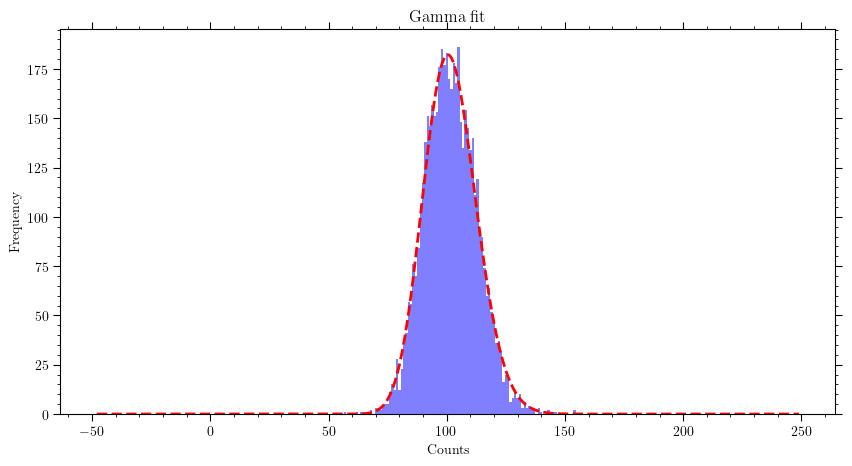

In [145]:
_ = plot_and_stats('/home/ravioli/astro/ksp/grb/GRB160909A/1s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc', 830, 845, window=101, gamma=True, plot=True, in_bins=300)